# HW1. (MOM)

Find a simple dataset with a one-humped histogram and model it by matching with the pdfs we learned till today. Find the most likely parameters for your pdf using MOM. 

In [1049]:
import pandas as pd
pf = pd.read_csv("SOCR-HeightWeight.csv", index_col=0, na_values='NA')
pf.head()

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


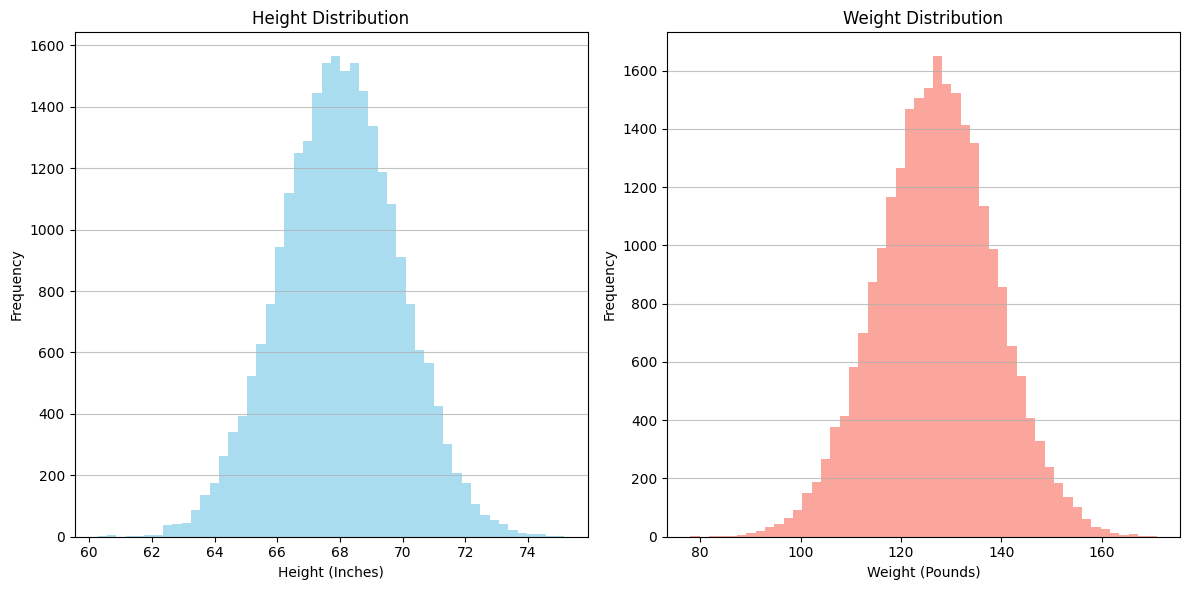

In [1050]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].hist(pf['Height(Inches)'], bins=50, color='skyblue', alpha=0.7)
axes[0].set_title('Height Distribution')
axes[0].set_xlabel('Height (Inches)')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.75)

# Plot histogram for Weight
axes[1].hist(pf['Weight(Pounds)'], bins=50, color='salmon', alpha=0.7)
axes[1].set_title('Weight Distribution')
axes[1].set_xlabel('Weight (Pounds)')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', alpha=0.75)

# Show the histograms
plt.tight_layout()
plt.show()

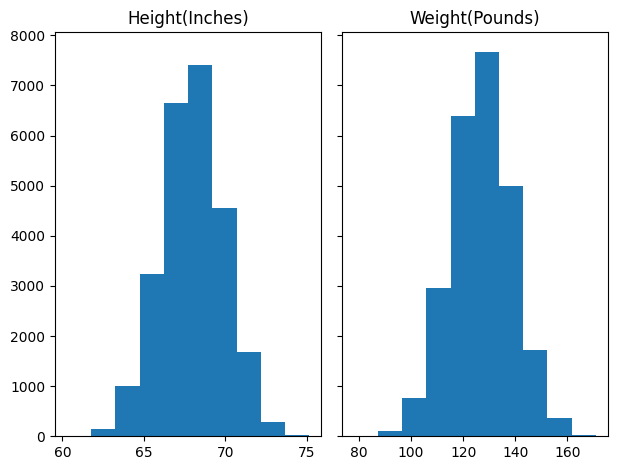

In [1051]:
pf.hist(sharex=False, sharey=True, grid=False)
plt.tight_layout()

<Axes: >

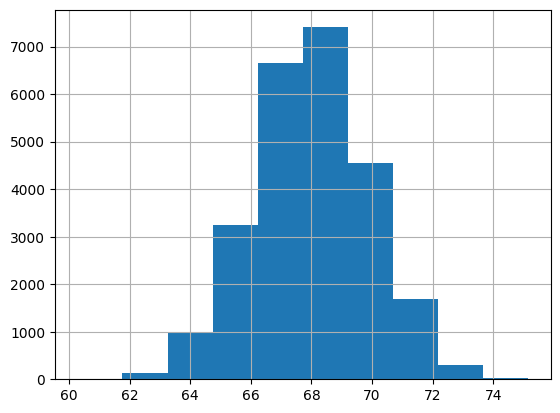

In [1052]:
pf['Height(Inches)'].hist()

In [1053]:
pfm = pf.mean()
pfm

Height(Inches)     67.993114
Weight(Pounds)    127.079421
dtype: float64

In [1054]:
pfv = pf.var()
pfv

Height(Inches)      3.616382
Weight(Pounds)    135.976532
dtype: float64

In [1055]:
alpha_mom = pfm**2 / pfv
beta_mom = pfv / pfm
alpha_mom, beta_mom

(Height(Inches)    1278.366972
 Weight(Pounds)     118.764459
 dtype: float64,
 Height(Inches)    0.053187
 Weight(Pounds)    1.070012
 dtype: float64)

In [1056]:
alpha_mom[0], beta_mom[0]

C:\Users\jihui\AppData\Local\Temp\ipykernel_5140\997046254.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_mom[0], beta_mom[0]


(1278.3669718235535, 0.053187476753885285)

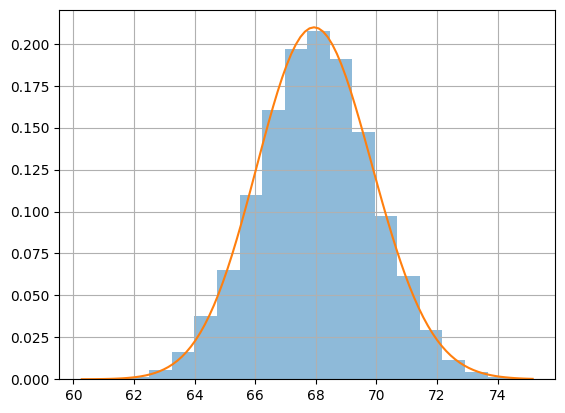

In [1063]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats.distributions import gamma

pf['Height(Inches)'].hist(density=True, bins=20, alpha=0.5)

x = np.linspace(pf['Height(Inches)'].min(), pf['Height(Inches)'].max(), 100)
plt.plot(x, gamma.pdf(x, alpha_mom.iloc[0], scale=beta_mom.iloc[0]))

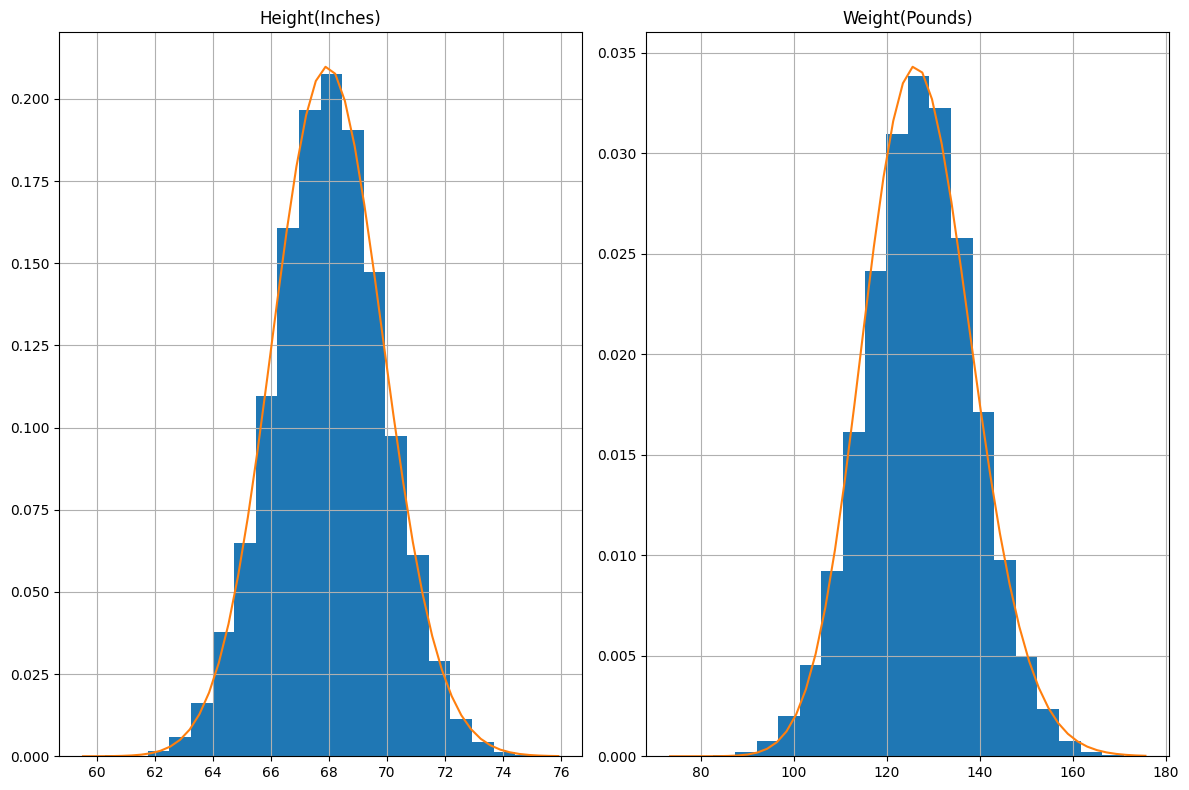

In [1066]:
axs = pf.hist(density=True, figsize=(12, 8), sharex=False, sharey=False, bins=20, grid=True)

for ax in axs.ravel():
    
    # Get title
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], scale=beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))
    
plt.tight_layout()

## If you thought Height and Wweight is boring, then I give a game dataset.

In [456]:
import pandas as pd
pf_1 = pd.read_csv("games.csv", index_col=0, na_values='NA')
pf_1.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [457]:

# convert date format to'MMM DD, YYYY'
pf_1['Release Date'] = pd.to_datetime(pf_1['Release Date'], format='%b %d, %Y', errors='coerce')

# get year and month
pf_1['Year'] = pf_1['Release Date'].dt.year
pf_1['Month'] = pf_1['Release Date'].dt.month_name()
# calculate each month average rating
monthly_rating = pf_1.pivot_table(index='Year', columns='Month', values='Rating', aggfunc='mean')

# convert number to month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_rating = monthly_rating.reindex(columns=month_order)

mr = monthly_rating.copy()
mr.head(5)

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
1980.0,NaN,NaN,NaN,NaN,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,NaN,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN
1986.0,NaN,3.2,NaN,NaN,NaN,3.3,NaN,NaN,3.4,NaN,NaN,NaN
1987.0,2.6,NaN,NaN,NaN,NaN,NaN,2.9,NaN,NaN,NaN,NaN,2.8


In [458]:
# fill the table NaN value with mean
for i in month_order: 
    mr.fillna(value={i: mr[i].mean()}, inplace=True)
mr.head()

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
1980.0,3.671506,3.696316,3.744878,3.789162,3.400000,3.670298,3.76047,3.525962,3.724995,3.709077,3.625643,3.737267
1982.0,3.671506,3.600000,3.744878,3.789162,3.726548,3.670298,3.76047,3.525962,3.724995,3.709077,3.625643,3.737267
1985.0,3.671506,3.696316,3.744878,3.789162,3.726548,3.670298,3.76047,3.525962,3.500000,3.709077,3.625643,3.737267
1986.0,3.671506,3.200000,3.744878,3.789162,3.726548,3.300000,3.76047,3.525962,3.400000,3.709077,3.625643,3.737267
1987.0,2.600000,3.696316,3.744878,3.789162,3.726548,3.670298,2.90000,3.525962,3.724995,3.709077,3.625643,2.800000


In [459]:
mrm = mr.mean()
mrm

Month
January      3.671506
February     3.696316
March        3.744878
April        3.789162
May          3.726548
June         3.670298
July         3.760470
August       3.525962
September    3.724995
October      3.709077
November     3.625643
December     3.737267
dtype: float64

In [460]:
mrv = mr.var()
mrv

Month
January      0.212455
February     0.058872
March        0.085391
April        0.084676
May          0.131205
June         0.079326
July         0.069584
August       0.104290
September    0.070076
October      0.035086
November     0.127121
December     0.100081
dtype: float64

In [461]:
alpha_mom_mr = mrm**2 / mrv
beta_mom_mr= mrv/mrm
alpha_mom_mr, beta_mom_mr

(Month
 January       63.448539
 February     232.075757
 March        164.234603
 April        169.561778
 May          105.843056
 June         169.819403
 July         203.224773
 August       119.209655
 September    198.006419
 October      392.097371
 November     103.407689
 December     139.558956
 dtype: float64,
 Month
 January      0.057866
 February     0.015927
 March        0.022802
 April        0.022347
 May          0.035208
 June         0.021613
 July         0.018504
 August       0.029578
 September    0.018812
 October      0.009460
 November     0.035062
 December     0.026779
 dtype: float64)

C:\Users\jihui\AppData\Local\Temp\ipykernel_5140\2289304523.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(x, gamma.pdf(x, alpha_mom_mr[0], scale=beta_mom_mr[0]))


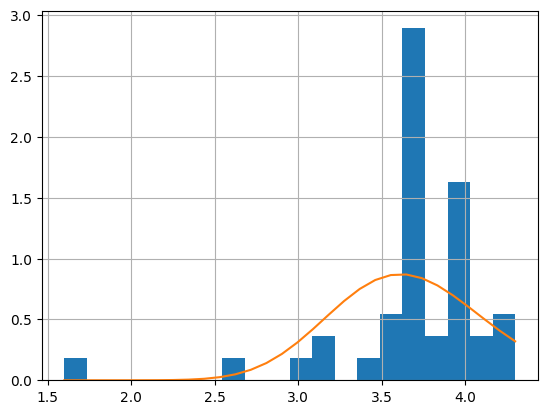

In [462]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats.distributions import gamma

# precip.Jan.hist(normed=True, bins=20)

mr['January'].hist(density=True, bins=20)

x = np.linspace(mr['January'].min(), mr['January'].max(), 30)
plt.plot(x, gamma.pdf(x, alpha_mom_mr[0], scale=beta_mom_mr[0]))

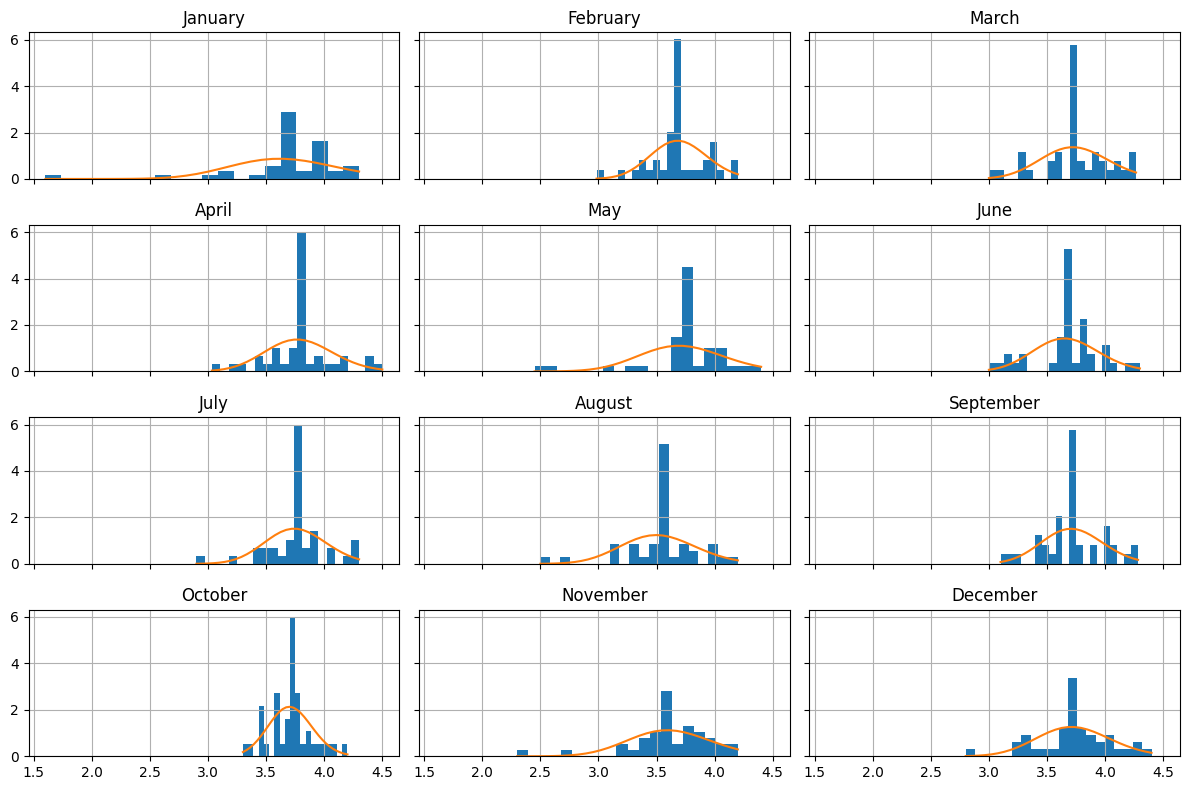

In [463]:
axs = mr.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=20, grid=True)

for ax in axs.ravel():
    
    # Get month
    m = ax.get_title()
    
    # Plot fitted distribution
    # x = np.linspace(*ax.get_xlim())
    x = np.linspace(mr[m].min(), mr[m].max(), 30)
    ax.plot(x, gamma.pdf(x, alpha_mom_mr[m], scale=beta_mom_mr[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom_mr[m], beta_mom_mr[m])
    ax.annotate(label, xy=(10, 0.2))
    
plt.tight_layout()

# HW2

Build a generative model allowing you to actually roll your gaussian-loaded die and generate random variates. Then, generate 100 random variates from it. Plot their histogram. How close does it match the theoretical histogram? Evaluate the error.

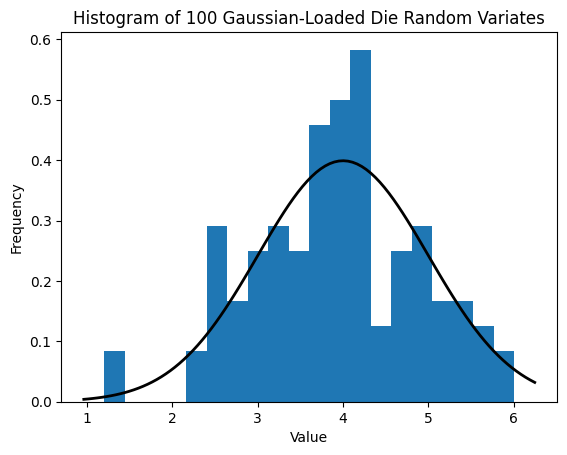

In [464]:
import numpy as np
import matplotlib.pyplot as plt

# mean and std
mean = 4
std = 1

# Generate 100 random variates
rv = np.random.normal(mean, std, 100)

# Plot their histogram
plt.hist(rv, bins=20, density=True)

# Add titles and labels
plt.title('Histogram of 100 Gaussian-Loaded Die Random Variates')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-((x - mean) ** 2) / (2 * std ** 2)) / (std * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)

plt.show()

In [465]:
import scipy.stats as st
dist = st.expon
args = dist.fit(rv)
args

(1.2014864278023882, 2.7277111004687726)

In [466]:

st.kstest(rv, dist.cdf, args)

KstestResult(statistic=0.3253150753891303, pvalue=6.366650528118658e-10, statistic_location=2.858701228119099, statistic_sign=-1)

In [467]:
dist = st.fatiguelife
args = dist.fit(rv)
st.kstest(rv, dist.cdf, args)

KstestResult(statistic=0.05715109874654223, pvalue=0.8808736964456145, statistic_location=4.281161022596808, statistic_sign=1)

There is not enough evidence to reject the null hypothesis that these random variables come from the Gaussian distribution of our parameters, and the match between the actual data and the theoretical Gaussian distribution is statistically quite good, and the error is not significant

# HW3 (MLE)
Find a simple dataset with a one-humped histogram and model it by matching with the pdfs we learned till today. Find the most likely parameters for your pdf using MLE. 

In [1067]:
import pandas as pd
sales_data = pd.read_csv("training_Sales.csv", index_col=0, na_values='NA')
sales_data.head()

,Value
Date,
2013-11-07 13:00:00,830
2013-11-07 13:15:00,885
2013-11-07 13:30:00,938
2013-11-07 13:45:00,804
2013-11-07 14:00:00,793


In [1068]:
# Convert 'date' column to datetime
sales_data.index = pd.to_datetime(sales_data.index)

# set year-month as row
sales_data['YearMonth'] = sales_data.index.to_period('M')

# Set hour as column
sales_data['Hour'] = sales_data.index.hour

# get sales frequency
hourly_frequency = sales_data.groupby(['YearMonth', 'Hour']).size().unstack(fill_value=0)

hourly_frequency.head()

Hour,0,1,5,6,7,8,9,10,11,12,...,14,15,16,17,18,19,20,21,22,23
YearMonth,,,,,,,,,,,,,,,,,,,,,
2013-11,0,0,0,4,4,5,12,67,86,87,...,88,85,84,82,75,64,62,13,1,1
2013-12,4,2,0,0,6,33,58,109,115,116,...,115,115,113,115,108,98,90,65,33,12
2014-01,0,0,0,0,0,0,3,92,118,124,...,119,120,120,117,94,90,81,10,0,0
2014-02,0,0,0,0,0,1,2,80,107,109,...,110,103,104,102,94,79,75,11,0,0
2014-03,0,0,0,0,0,3,5,86,113,118,...,119,118,118,117,98,89,85,12,0,0


In [1069]:
hourly_frequency.columns = [f"{i}:00" for i in hourly_frequency.columns]
hourly_frequency.head()

,0:00,1:00,5:00,6:00,7:00,8:00,9:00,10:00,11:00,12:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
YearMonth,,,,,,,,,,,,,,,,,,,,,
2013-11,0,0,0,4,4,5,12,67,86,87,...,88,85,84,82,75,64,62,13,1,1
2013-12,4,2,0,0,6,33,58,109,115,116,...,115,115,113,115,108,98,90,65,33,12
2014-01,0,0,0,0,0,0,3,92,118,124,...,119,120,120,117,94,90,81,10,0,0
2014-02,0,0,0,0,0,1,2,80,107,109,...,110,103,104,102,94,79,75,11,0,0
2014-03,0,0,0,0,0,3,5,86,113,118,...,119,118,118,117,98,89,85,12,0,0


In [1070]:
hourly_frequency = hourly_frequency[[f"{i}:00" for i in range(10, 22)]]
hourly_frequency.head()

,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00
YearMonth,,,,,,,,,,,,
2013-11,67,86,87,92,88,85,84,82,75,64,62,13
2013-12,109,115,116,116,115,115,113,115,108,98,90,65
2014-01,92,118,124,124,119,120,120,117,94,90,81,10
2014-02,80,107,109,109,110,103,104,102,94,79,75,11
2014-03,86,113,118,121,119,118,118,117,98,89,85,12


In [1071]:
hfm = hourly_frequency.mean()
hfm

10:00     83.890909
11:00    113.654545
12:00    116.018182
13:00    116.381818
14:00    115.236364
15:00    113.927273
16:00    113.290909
17:00    112.436364
18:00    107.763636
19:00     96.236364
20:00     85.563636
21:00     27.636364
dtype: float64

In [1072]:
hfv = hourly_frequency.var()
hfv

10:00    209.802694
11:00    193.304377
12:00    197.055219
13:00    192.129293
14:00    195.554209
15:00    195.587205
16:00    197.506397
17:00    194.324579
18:00    211.072727
19:00    186.591246
20:00    153.954209
21:00    256.939394
dtype: float64

In [1073]:
a = hfm**2/hfv
b = hfv/hfm
a,b

(10:00    33.544301
 11:00    66.823917
 12:00    68.306836
 13:00    70.497983
 14:00    67.906590
 15:00    66.361312
 16:00    64.984376
 17:00    65.055774
 18:00    55.018957
 19:00    49.634899
 20:00    47.553983
 21:00     2.972563
 dtype: float64,
 10:00    2.500899
 11:00    1.700806
 12:00    1.698486
 13:00    1.650853
 14:00    1.696984
 15:00    1.716772
 16:00    1.743356
 17:00    1.728307
 18:00    1.958664
 19:00    1.938885
 20:00    1.799295
 21:00    9.297149
 dtype: float64)

In [1074]:
from scipy.optimize import newton
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [1075]:
from scipy.special import psi, polygamma

# Note that log_mean and mean_log are parameters of the dlgamma function
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [1076]:
# Calculate statistics
log_mean = hourly_frequency.mean().apply(np.log)
log_mean

10:00    4.429517
11:00    4.733164
12:00    4.753747
13:00    4.756876
14:00    4.746985
15:00    4.735560
16:00    4.729959
17:00    4.722387
18:00    4.679940
19:00    4.566807
20:00    4.449260
21:00    3.319132
dtype: float64

In [1077]:
mean_log = hourly_frequency.apply(np.log).mean()
mean_log

10:00    4.404637
11:00    4.716969
12:00    4.737949
13:00    4.741316
14:00    4.730757
15:00    4.719759
16:00    4.713568
17:00    4.706554
18:00    4.663126
19:00    4.548173
20:00    4.430566
21:00    3.185439
dtype: float64

In [1078]:
alpha_mle = {i:newton(dlgamma, 2, dl2gamma, args=(log_mean[i], mean_log[i])) for i in log_mean.keys()}
alpha_mle

{'10:00': 20.261713617947557,
 '11:00': 31.039616032569192,
 '12:00': 31.814736212649077,
 '13:00': 32.29884081797761,
 '14:00': 30.97538565936838,
 '15:00': 31.807891084559575,
 '16:00': 30.669940730161272,
 '17:00': 31.74397706080981,
 '18:00': 29.901730163629903,
 '19:00': 26.997549578685337,
 '20:00': 26.911513395504464,
 '21:00': 3.8987600885653197}

In [1079]:
beta_mle = {j:(alpha_mle[j]/hourly_frequency[j].mean()) for j in alpha_mle.keys()}
beta_mle

{'10:00': 0.24152454464393489,
 '11:00': 0.2731049242987211,
 '12:00': 0.27422198584793905,
 '13:00': 0.27752480002949054,
 '14:00': 0.26879870799388783,
 '15:00': 0.2791947031041776,
 '16:00': 0.270718462551576,
 '17:00': 0.28232838589012604,
 '18:00': 0.277475140711936,
 '19:00': 0.28053376664041063,
 '20:00': 0.31452044979871346,
 '21:00': 0.14107355583624512}

2.5008990351426412
1.7008063894961993
1.6984856663590406
1.6508531653040328
1.6969835092271193
1.7167724698845028
1.7433560988367598
1.7283072205452545
1.9586637421967268
1.938885040339792
1.7992948324440041
9.297149122807017


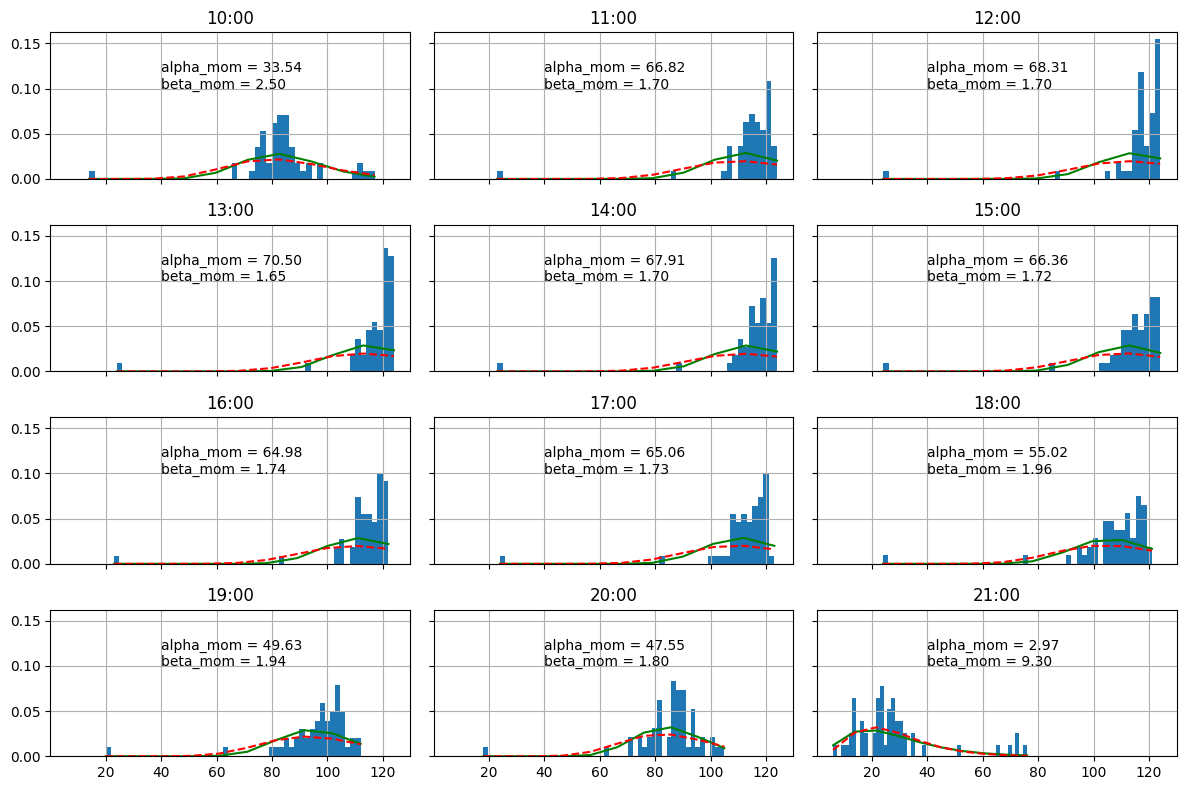

In [1112]:
from scipy.stats.distributions import gamma
axs = hourly_frequency.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=50, grid=True)

for ax in axs.ravel():
    
    # Get title
    m = ax.get_title()
    # Plot fitted distribution
    x = np.linspace(hourly_frequency[m].min(),hourly_frequency[m].max(),10)
    print(b[m])
    ax.plot(x, gamma.pdf(x, a[m], scale=b[m]),'g-')
    ax.plot(x, gamma.pdf(x, alpha_mle[m],scale=1/beta_mle[m]),"r--")

    label = 'alpha_mom = {0:.2f}\nbeta_mom = {1:.2f}'.format(a[m], b[m])
    ax.annotate(label, xy=(40, 0.1))
    label = 'alpha_mle = {0:.2f}\nbeta_mle = {1:.2f}'.format(alpha_mle[m], beta_mle[m])
    ax.annotate(label, xy=(20, 0.3))
plt.tight_layout()